In [25]:
import os
import numpy # type: ignore
import cv2  # type: ignore
import torch  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
from PIL import Image # type: ignore
import torchvision # type: ignore 

In [2]:
traindata_dir = "./data/train"
traindata_info_file = "./data/train.csv"
traindata_info = pd.read_csv(traindata_info_file)
traindata_info

,class_name,image_path,target
0,n01872401,n01872401/sketch_50.JPEG,59
1,n02417914,n02417914/sketch_11.JPEG,202
2,n02106166,n02106166/sketch_3.JPEG,138
3,n04235860,n04235860/sketch_2.JPEG,382
4,n02056570,n02056570/sketch_40.JPEG,80
...,...,...,...
15016,n02108089,n02108089/sketch_32.JPEG,143
15017,n02129604,n02129604/sketch_7.JPEG,172
15018,n07920052,n07920052/sketch_26.JPEG,484
15019,n02325366,n02325366/sketch_46.JPEG,186


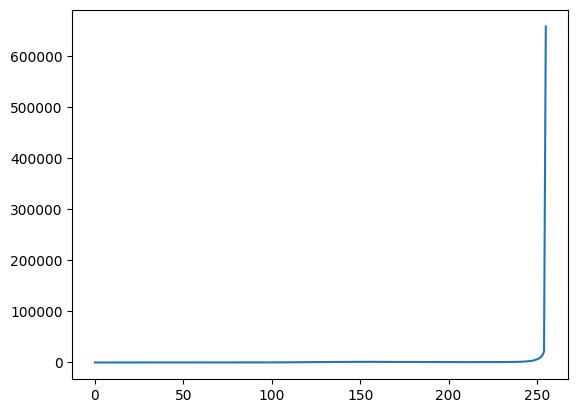

In [18]:
image_path = os.path.join(traindata_dir, traindata_info.iloc[0, :]['image_path'])
torch_image = torchvision.io.read_image(image_path)
bins = torch.linspace(0, 256, 257)
hist = torch.histogram(torch_image.float(), bins=bins)
plt.plot(hist.bin_edges[:-1], hist.hist)

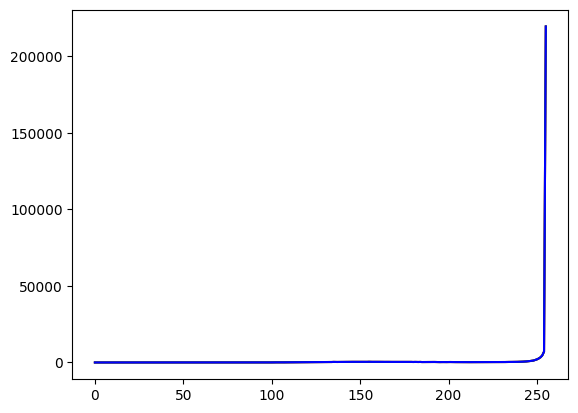

In [19]:
image_path = os.path.join(traindata_dir, traindata_info.iloc[0, :]['image_path'])
torch_image = torchvision.io.read_image(image_path)
bins = torch.linspace(0, 256, 257)
hist = [torch.histogram(c, bins=bins) for c in torch_image.float()]
plt.plot(hist[0].bin_edges[:-1], hist[0].hist, color="r")
plt.plot(hist[1].bin_edges[:-1], hist[1].hist, color="g")
plt.plot(hist[2].bin_edges[:-1], hist[2].hist, color="b")

In [21]:
from collections import defaultdict

mode_count = defaultdict(int)

for i in range(len(traindata_info)):
    image_path = os.path.join(traindata_dir, traindata_info.iloc[i, :]['image_path'])
    image = Image.open(image_path)
    mode = image.mode
    mode_count[mode] += 1

mode_count

defaultdict(int, {'RGB': 12443, 'L': 2578})

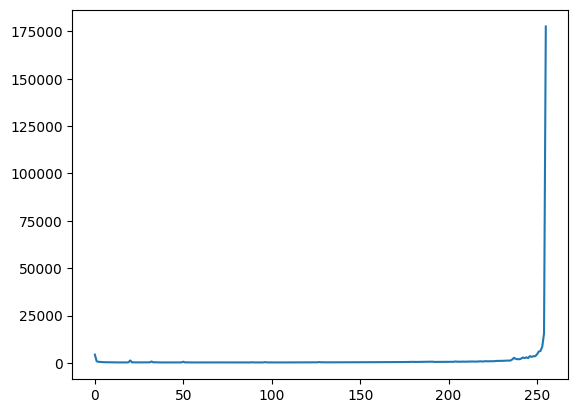

In [27]:
bins = torch.linspace(0, 256, 257)
sum_hist = torch.zeros(256)

for i in range(len(traindata_info)):
    image_path = os.path.join(traindata_dir, traindata_info.iloc[i, :]['image_path'])
    image = Image.open(image_path).convert('L')
    image_tensor = torch.tensor(np.array(image)).float()
    hist, _ = torch.histogram(image_tensor, bins=bins)
    sum_hist += hist

avg_hist = sum_hist / len(traindata_info)

plt.plot(bins[:-1], avg_hist)

In [33]:
bins = torch.linspace(0, 256, 257)
sum_hist_L = torch.zeros(256)
sum_hist_R = torch.zeros(256)
sum_hist_G = torch.zeros(256)
sum_hist_B = torch.zeros(256)
image_L_count = 0
image_RGB_count = 0

for i in range(len(traindata_info)):
    image_path = os.path.join(traindata_dir, traindata_info.iloc[i, :]['image_path'])
    image = Image.open(image_path)
    mode = image.mode
    if mode == 'L':
        image_tensor = torch.tensor(np.array(image)).float()
        hist, _ = torch.histogram(image_tensor, bins=bins)
        sum_hist_L += hist
        image_L_count += 1
    else: # 여기선 mode가 RGB인 경우 
        image_tensor = torch.tensor(np.array(image)).float()
        hist_r, _ = torch.histogram(image_tensor[:,:,0], bins=bins)
        hist_g, _ = torch.histogram(image_tensor[:,:,1], bins=bins)
        hist_b, _ = torch.histogram(image_tensor[:,:,2], bins=bins)
        sum_hist_R += hist_r
        sum_hist_G += hist_g
        sum_hist_B += hist_b
        image_RGB_count += 1

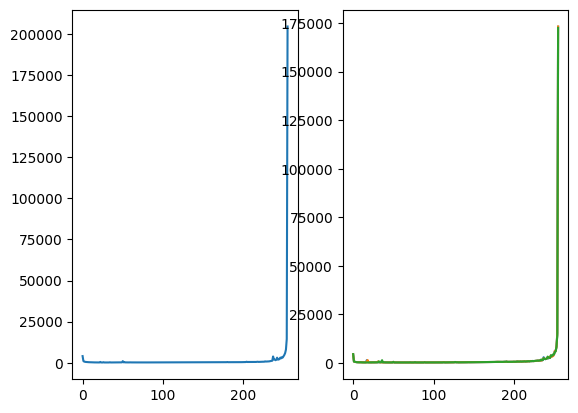

In [36]:
avg_hist_L = sum_hist_L / image_L_count
avg_hist_R = sum_hist_R / image_RGB_count
avg_hist_G = sum_hist_G / image_RGB_count
avg_hist_B = sum_hist_B / image_RGB_count

fig, axes = plt.subplots(1, 2)
axes[0].plot(bins[:-1], avg_hist_L)
axes[1].plot(bins[:-1], avg_hist_R)
axes[1].plot(bins[:-1], avg_hist_G)
axes[1].plot(bins[:-1], avg_hist_B)

plt.show()